In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
# You need to set the working directory to where you have your shapefile data


# Let's create a graph from the shapefile
g_shp=nx.read_shp('./underground/underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_2_,station_2,station_1,toid_seq,distance,ShpName,station_1_
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",Marylebone,163,11,1,416.586050,underground,Baker Street
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",Regent's Park,212,11,2,734.173636,underground,Baker Street
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",Edgware Road (C),83,11,171,931.211577,underground,Baker Street
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",Great Portland Street,104,11,225,925.826411,underground,Baker Street
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",Bond Street,28,11,197,1076.607648,underground,Baker Street
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",St. John's Wood,249,11,198,1785.442777,underground,Baker Street
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",Finchley Road,94,11,226,3175.274183,underground,Baker Street
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",Embankment,87,49,277,179.503418,underground,Charing Cross
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",Picadilly Circus,197,49,4,689.289845,underground,Charing Cross
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",Leicester Square,151,49,278,436.484594,underground,Charing Cross


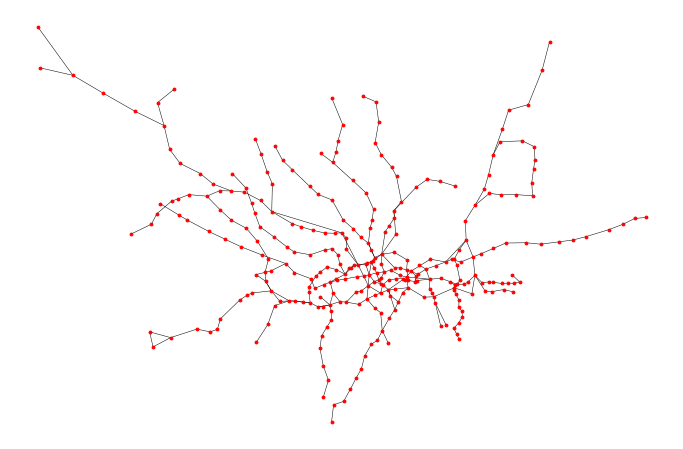

In [4]:
# Let's plot the tube network:

# first we need to extract the coordinates from every node:
pos = {xy: xy for xy in g_shp.nodes()}

fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [5]:
#we will need to add station names as attributes of the nodes:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#nod_all = {**nod_st1, **nod_st2} #for python 3.5 and greater

#In Python 2, (or 3.4 or lower) write a function
nod_all = nod_st1.copy()   # start with x's keys and values
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

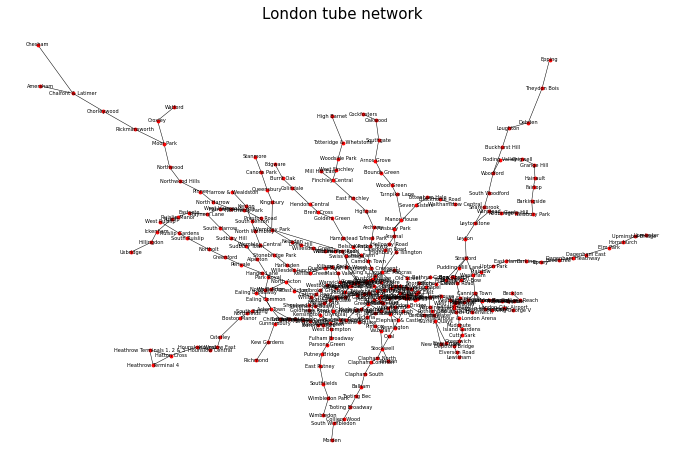

In [6]:
#We can plot the underground network with stations names:
fig, ax = plt.subplots(figsize=(12,8))

node_labels = nx.get_node_attributes(g_shp, 'station')

pos = {xy: xy for xy in g_shp.nodes()}

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
nx.draw_networkx_labels(g_shp,pos, node_labels, font_size=5,font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [7]:
#do we want this graph to be a directed one? In fact, only a few links in the dataset are directed

# We can transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()

#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
list(g_shp_un.nodes(data=True))[0:10]


[((-0.1571, 51.5226),
  {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 ((-0.1631, 51.5225),
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 ((-0.1466, 51.5234),
  {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 ((-0.1247, 51.508),
  {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 ((-0.1223, 51.5074),
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 ((-0.1342, 51.5098),
  {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 ((-0.1679, 51.5199),
  {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 ((-0.1755, 51.5154),
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 ((-0.1001, 51.4943),
  {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 ((-0.1115, 51.4991),
  {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [8]:
#2.now relabel each node with an ordered integer:
node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
list(g_shp_un.nodes(data=True))[0:10]

[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 (3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 (4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 (5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 (6, {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 (7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 (8, {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 (9, {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [9]:
#Let us compute the degree centrality
deg=nx.degree(g_shp_un)

# Print degree as list: 
list(deg)[0:10]

[(0, 7),
 (1, 2),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 4),
 (6, 2),
 (7, 5),
 (8, 3),
 (9, 2)]

In [10]:
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,dict(deg),'degree')
list(g_shp_un.nodes(data=True))[0:10]


[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7}),
 (1,
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225), 'degree': 2}),
 (2,
  {'station': "Regent's Park",
   'station_coord': (-0.1466, 51.5234),
   'degree': 2}),
 (3,
  {'station': 'Charing Cross',
   'station_coord': (-0.1247, 51.508),
   'degree': 3}),
 (4,
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074), 'degree': 4}),
 (5,
  {'station': 'Picadilly Circus',
   'station_coord': (-0.1342, 51.5098),
   'degree': 4}),
 (6,
  {'station': 'Edgware Road (B)',
   'station_coord': (-0.1679, 51.5199),
   'degree': 2}),
 (7,
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154), 'degree': 5}),
 (8,
  {'station': 'Elephant & Castle',
   'station_coord': (-0.1001, 51.4943),
   'degree': 3}),
 (9,
  {'station': 'Lambeth North',
   'station_coord': (-0.1115, 51.4991),
   'degree': 2})]

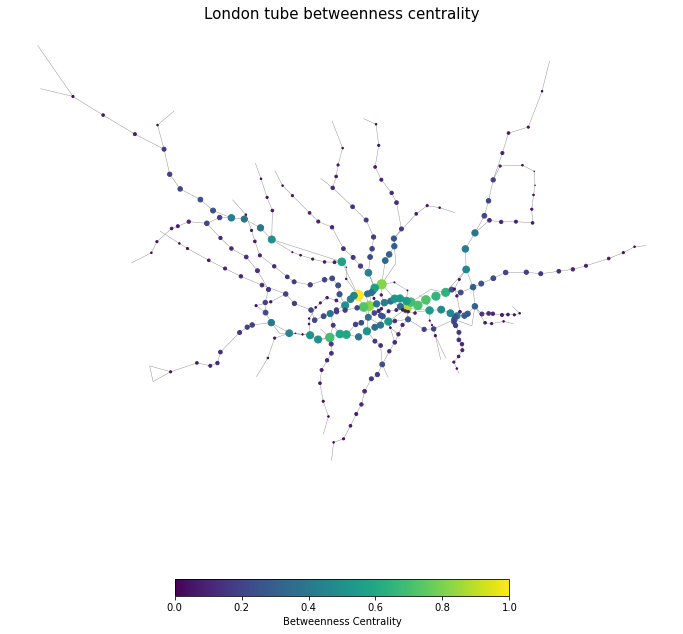

In [11]:
#Let's compare node centrality for the undirected tube network and the directed commuting flows network:
#Let us compute the betweenness centrality for the undirected tube network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(g_shp_un, weight='distance', normalized=False)
# We can add these values as node attributes:
nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_un')

# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_un']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_un']/max(betweenness_w_values)) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_un']/max(betweenness_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [12]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
list(listbet_un.items())[:10]

[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7,
   'betweenness_un': 13194.0}),
 (25,
  {'station': 'Bank',
   'station_coord': (-0.0886, 51.5133),
   'degree': 6,
   'betweenness_un': 11605.0}),
 (24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'betweenness_un': 10847.0}),
 (88,
  {'station': "King's Cross St. Pancras",
   'station_coord': (-0.1238, 51.5308),
   'degree': 7,
   'betweenness_un': 10794.0}),
 (33,
  {'station': 'Bond Street',
   'station_coord': (-0.1494, 51.5142),
   'degree': 4,
   'betweenness_un': 9597.0}),
 (96,
  {'station': 'Whitechapel',
   'station_coord': (-0.0612, 51.5194),
   'degree': 4,
   'betweenness_un': 9500.0}),
 (95,
  {'station': 'Aldgate East',
   'station_coord': (-0.0726, 51.5154),
   'degree': 3,
   'betweenness_un': 9334.0}),
 (116,
  {'station': "Earl's Court",
   'station_coord': (-0.1973, 51.492),
   'degree': 6,
   'betweenness_un': 9201.0}),
 (26,
  {'s

In [13]:
## degree centrality
deg_norm =nx.degree_centrality(g_shp_un)

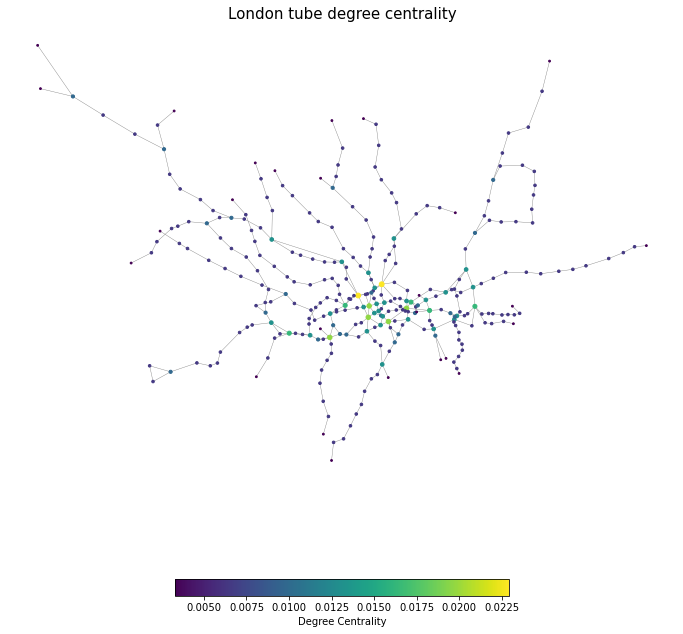

In [14]:
nx.set_node_attributes(g_shp_un,dict(deg_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_shp_un.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_shp_un.nodes(data=True)]




# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()



In [15]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['degree_norm'],reverse=True))
list(listbet_un.items())[:10]

[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7,
   'betweenness_un': 13194.0,
   'degree_norm': 0.022950819672131147}),
 (88,
  {'station': "King's Cross St. Pancras",
   'station_coord': (-0.1238, 51.5308),
   'degree': 7,
   'betweenness_un': 10794.0,
   'degree_norm': 0.022950819672131147}),
 (10,
  {'station': 'Waterloo',
   'station_coord': (-0.1143, 51.5036),
   'degree': 6,
   'betweenness_un': 6943.0,
   'degree_norm': 0.019672131147540982}),
 (24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'betweenness_un': 10847.0,
   'degree_norm': 0.019672131147540982}),
 (25,
  {'station': 'Bank',
   'station_coord': (-0.0886, 51.5133),
   'degree': 6,
   'betweenness_un': 11605.0,
   'degree_norm': 0.019672131147540982}),
 (116,
  {'station': "Earl's Court",
   'station_coord': (-0.1973, 51.492),
   'degree': 6,
   'betweenness_un': 9201.0,
   'degree_norm': 0.019672131147540982}),
 (155,
  {'station'

In [16]:
##Lets compute weighted closeness
clos=nx.closeness_centrality(g_shp_un, distance='distance')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_shp_un,clos,'closeness')

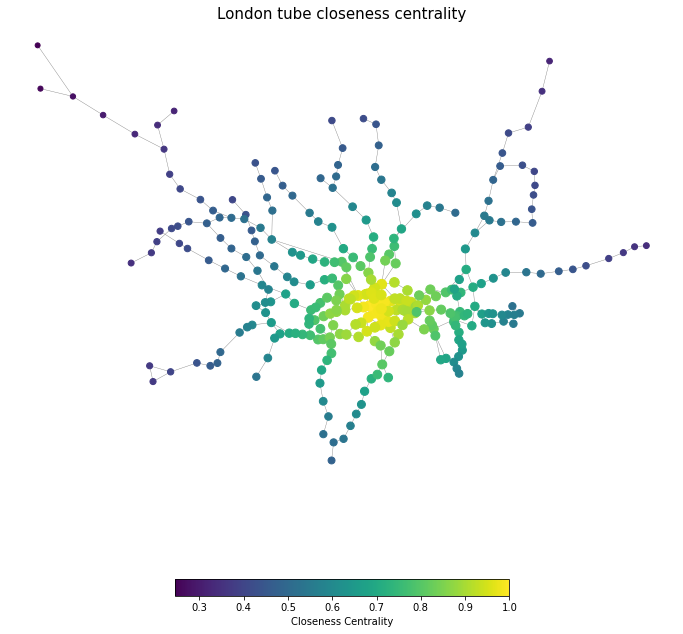

In [17]:

# Lets set colour and size of nodes according to betweenness values
clos_w_values=[(i[1]['closeness']) for i in g_shp_un.nodes(data=True)]

clos_w_color=[(i[1]['closeness']/max(clos_w_values)) for i in g_shp_un.nodes(data=True)]
clos_w_size=[(i[1]['closeness']/max(clos_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= clos_w_color,
        node_size= clos_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality",fontsize=15)
plt.show()

In [18]:
#get a list of nodes with higeher betweeness centrality:
dict_clos_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listclos_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['closeness'],reverse=True))
list(listclos_un.items())[:10]

[(24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'betweenness_un': 10847.0,
   'degree_norm': 0.019672131147540982,
   'closeness': 8.912373757112555e-05}),
 (58,
  {'station': 'Tottenham Court Road',
   'station_coord': (-0.131, 51.5165),
   'degree': 4,
   'betweenness_un': 5021.0,
   'degree_norm': 0.013114754098360656,
   'closeness': 8.854783127731213e-05}),
 (5,
  {'station': 'Picadilly Circus',
   'station_coord': (-0.1342, 51.5098),
   'degree': 4,
   'betweenness_un': 2711.0,
   'degree_norm': 0.013114754098360656,
   'closeness': 8.822764047514472e-05}),
 (39,
  {'station': 'Holborn',
   'station_coord': (-0.12, 51.5174),
   'degree': 4,
   'betweenness_un': 5505.0,
   'degree_norm': 0.013114754098360656,
   'closeness': 8.80925704759346e-05}),
 (218,
  {'station': 'Leicester Square',
   'station_coord': (-0.1281, 51.5113),
   'degree': 4,
   'betweenness_un': 1420.0,
   'degree_norm': 0.013114754098360656,
   'closeness': 8.80446

In [21]:
#get a list of nodes with higeher betweeness centrality:
dict_clos_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listeigen_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['eigen'],reverse=True))
list_eigen = list(listeigen_un.items())
listdegree_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['degree_norm'],reverse=True))
list_degree = list(listdegree_un.items())
listbetween_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
list_between = list(listbetween_un.items())
listclos_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['closeness'],reverse=True))
list_clos = list(listclos_un.items())

In [27]:
list_eigen1 = []
list_eigen1_station = []
list_degree1 = []
list_degree1_station = []
list_clos1 = []
list_clos1_station = []
list_between1 = []
list_between1_station = []
for i in list_eigen:
    list_eigen1.append(i[0])
    list_eigen1_station.append(i[1].get('station'))
for i in list_degree:
    list_degree1.append(i[0])
    list_degree1_station.append(i[1].get('station'))
for i in list_clos:
    list_clos1.append(i[0])
    list_clos1_station.append(i[1].get('station'))
for i in list_between:
    list_between1.append(i[0])
    list_between1_station.append(i[1].get('station'))

In [32]:
import copy


In [34]:
degree_unse_trend = []

degree_unse_path = []
degree_unse_diameter = []
degree_unse_path_norm = []
degree_unse_diameter_norm = []
degree_unse_cluster = []
degree_unse_aver_deg =[]
G = copy.deepcopy(g_shp_un)
for i in range(0,15):

    G.remove_node(list_degree1[i])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    degree_unse_trend.append(len(G0))
    degrees = [val for (node, val) in G.degree()]
    degree_unse_aver_deg.append(sum(degrees)/len(degrees))

    degree_unse_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    degree_unse_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    degree_unse_diameter.append(d)
    degree_unse_diameter_norm.append(d/len(G0))
    degree_unse_cluster.append(nx.average_clustering(G))
    

0
305
1
285
2
284
3
282
4
281
5
271
6
270
7
253
8
247
9
232
10
230
11
217
12
182
13
182
14
169


In [35]:

degree_unse = pd.DataFrame({'station':list_degree1_station[0:15],'size':degree_unse_trend,'degree':degree_unse_aver_deg,'diameter':degree_unse_diameter_norm})

In [36]:

between_unse_trend = []
between_unse_node = []
between_unse_path = []
between_unse_diameter = []
between_unse_path_norm = []
between_unse_diameter_norm = []
between_unse_cluster = []
between_unse_aver_deg =[]
G = copy.deepcopy(g_shp_un)

for i in range(0,15):

    G.remove_node(list_between1[i])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    between_unse_trend.append(len(G0))
    degrees = [val for (node, val) in G.degree()]
    between_unse_aver_deg.append(sum(degrees)/len(degrees))
    between_unse_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    between_unse_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    between_unse_diameter.append(d)
    between_unse_diameter_norm.append(d/len(G0))
    between_unse_cluster.append(nx.average_clustering(G))

In [37]:
len(between_unse_trend)

15

In [38]:
between_unse = pd.DataFrame({'station':list_between1_station[0:15],'size':between_unse_trend,'degree':between_unse_aver_deg,'diameter':between_unse_diameter_norm})

In [40]:
clos_unse_trend = []

clos_unse_path = []
clos_unse_diameter = []
clos_unse_path_norm = []
clos_unse_diameter_norm = []
clos_unse_cluster = []
clos_unse_aver_deg =[]
G = copy.deepcopy(g_shp_un)
G = copy.deepcopy(g_shp_un)
for i in range(0,15):
    G.remove_node(list_clos1[i])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    clos_unse_trend.append(len(G0))
    degrees = [val for (node, val) in G.degree()]
    clos_unse_aver_deg.append(sum(degrees)/len(degrees))
    clos_unse_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    clos_unse_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    clos_unse_diameter.append(d)
    clos_unse_diameter_norm.append(d/len(G0))
    clos_unse_cluster.append(nx.average_clustering(G))


0
305
1
304
2
303
3
302
4
300
5
299
6
298
7
297
8
296
9
296
10
295
11
294
12
293
13
249
14
249


In [41]:
clos_unse = pd.DataFrame({'station':list_clos1_station[0:15],'size':clos_unse_trend,'degree':clos_unse_aver_deg,'diameter':clos_unse_diameter_norm})

In [43]:
degree_station = []
degree_trend = []
degree_node = []
degree_path = []
degree_diameter = []
degree_path_norm = []
degree_diameter_norm = []
degree_cluster = []
degree_aver_deg =[]
G = copy.deepcopy(g_shp_un)
for i in range(0,15):

    deg_norm =nx.degree_centrality(G)
    nx.set_node_attributes(G,dict(deg_norm),'degree_norm')
    dict_un=dict(G.nodes(data=True))
   
    degree_station.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['degree_norm'],reverse=True)).items())[0][1].get('station'))
    degree_node.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['degree_norm'],reverse=True)).items())[0][0])
    G.remove_node(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['degree_norm'],reverse=True)).items())[0][0])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    degrees = [val for (node, val) in G.degree()]
    degree_aver_deg.append(sum(degrees)/len(degrees))
    degree_trend.append(len(G0))
    degree_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    degree_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    degree_diameter.append(d)
    degree_diameter_norm.append(d/len(G0))
    degree_cluster.append(nx.average_clustering(G))
    

0
0
305
1
88
285
2
10
284
3
24
282
4
116
272
5
7
255
6
25
254
7
112
239
8
155
238
9
158
225
10
26
219
11
32
217
12
39
213
13
60
138
14
96
135


In [44]:
degree_se = pd.DataFrame({'station':degree_station[0:15],'size':degree_trend,'degree':degree_aver_deg,'diameter':degree_diameter_norm})

In [46]:
between_station = []
between_trend = []
between_node = []
between_path = []
between_diameter = []
between_path_norm = []
between_diameter_norm = []
between_cluster = []
between_aver_deg =[]
G = copy.deepcopy(g_shp_un)
for i in range(0,15):

    bet_london_w=nx.betweenness_centrality(G, weight='distance', normalized=False)
    nx.set_node_attributes(G,bet_london_w,'betweenness_un')
    dict_un=dict(G.nodes(data=True))
   
    between_node.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][0])
    between_station.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][1].get('station'))
    G.remove_node(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][0])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    degrees = [val for (node, val) in G.degree()]
    between_aver_deg.append(sum(degrees)/len(degrees))
    between_trend.append(len(G0))
    between_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    between_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    between_diameter.append(d)
    between_diameter_norm.append(d/len(G0))
    between_cluster.append(nx.average_clustering(G))
    
    

0
0
305
1
116
295
2
60
192
3
88
172
4
25
171
5
4
170
6
137
102
7
115
94
8
66
73
9
155
73
10
158
60
11
96
45
12
184
45
13
7
40
14
214
32


In [47]:
between_se = pd.DataFrame({'station':between_station[0:15] ,'size': between_trend,'degree':between_aver_deg,'diameter': between_diameter_norm})

In [49]:
clos_station = []
clos_trend = []
clos_node = []
clos_path = []
clos_diameter = []
clos_path_norm = []
clos_diameter_norm = []
clos_cluster = []
clos_aver_deg =[]
G = copy.deepcopy(g_shp_un)

for i in range(0,15):

    clos=nx.closeness_centrality(G, distance='distance')
    nx.set_node_attributes(G,clos,'closeness')
    dict_un=dict(G.nodes(data=True))

    clos_node.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][0])
    clos_station.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][1].get('station'))
    G.remove_node(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][0])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    degrees = [val for (node, val) in G.degree()]
    clos_aver_deg.append(sum(degrees)/len(degrees))
    clos_trend.append(len(G0))
    clos_path.append(nx.average_shortest_path_length(G0,weight='distance'))
    clos_path_norm.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    clos_diameter.append(d)
    clos_diameter_norm.append(d/len(G0))
    clos_cluster.append(nx.average_clustering(G))


0
24
305
1
5
304
2
86
303
3
88
285
4
221
142
5
96
140
6
25
139
7
290
138
8
109
132
9
4
132
10
60
131
11
101
130
12
279
130
13
156
130
14
170
63


In [50]:
clos_se = pd.DataFrame({'station':clos_station[0:15] ,'size':clos_trend,'degree':clos_aver_deg,'diameter':clos_diameter_norm,'clus':clos_cluster})

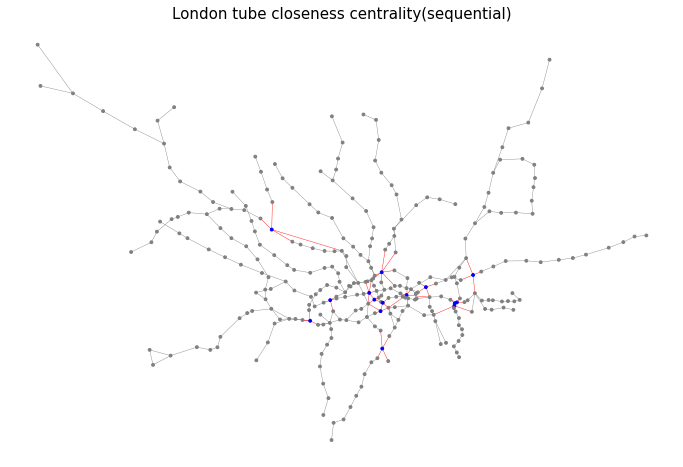

In [52]:
#make an empty graph
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in clos_node:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(clos_node):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)


plt.axis("off")
plt.title("London tube closeness centrality(sequential)",fontsize=15)


plt.savefig('clos_centrality_sequen_20.png')


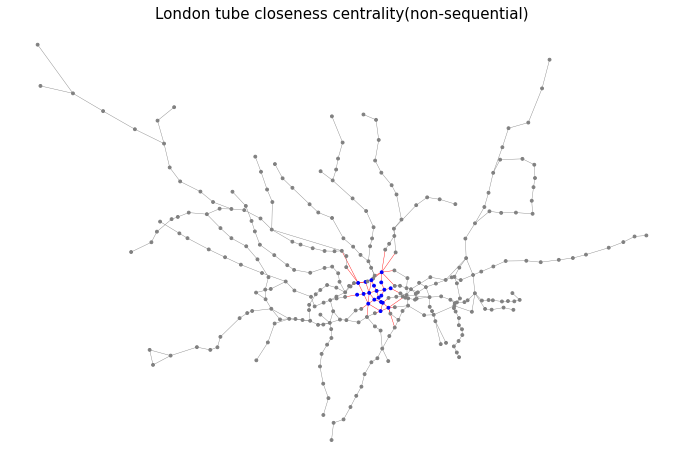

In [53]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_clos1[0:20]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_clos1[0:20]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)


plt.axis("off")
plt.title("London tube closeness centrality(non-sequential)",fontsize=15)


plt.savefig('clos_centrality_unsequen_20.png')

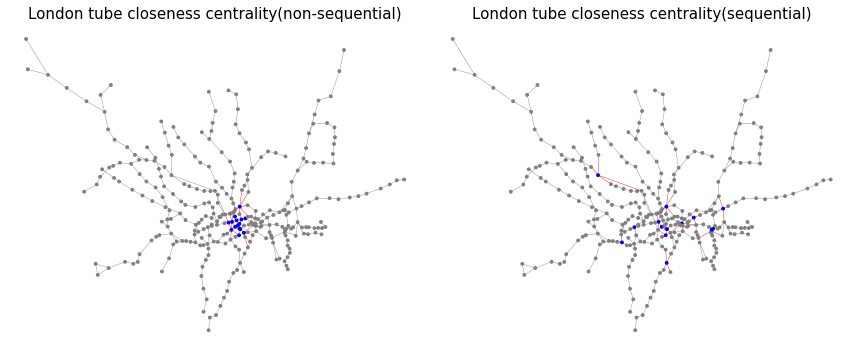

In [54]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_clos1[0:15]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_clos1[0:15]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:



node_color1=[]
edge_color1 = []
for node in g_shp_un.nodes(data = True):
    if node[0] in clos_node:
        node_color1.append('blue')
    else:
        node_color1.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(clos_node):
        edge_color1.append('red')
    else:
        edge_color1.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, axes = plt.subplots(1, 2,figsize=(12,5))
ax = axes.flatten()
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4,ax=ax[0])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8,ax=ax[0])


ax[0].set_axis_off()
ax[0].set_title("London tube closeness centrality(non-sequential)",fontsize=15)
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color1, 
        width=0.4,ax=ax[1])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color1,
        node_size= 8,ax=ax[1])

ax[1].set_axis_off()
ax[1].set_title("London tube closeness centrality(sequential)",fontsize=15)
fig.tight_layout()
plt.savefig('clos_centrality_se_unse.png')

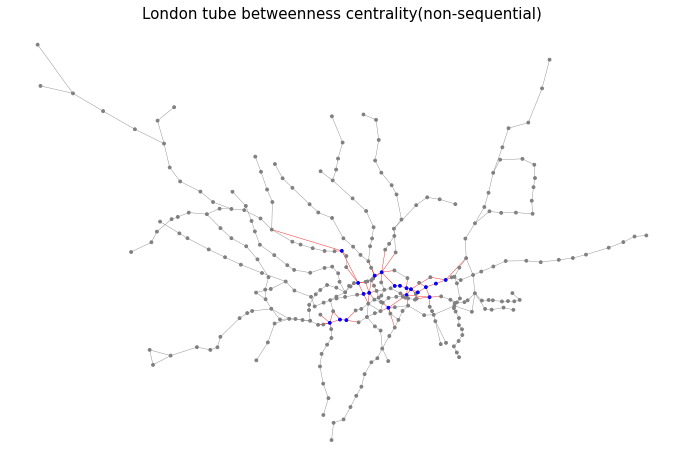

In [55]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_between1[0:20]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_between1[0:20]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)


plt.axis("off")
plt.title("London tube betweenness centrality(non-sequential)",fontsize=15)


plt.savefig('between_centrality_unsequen_20.png')

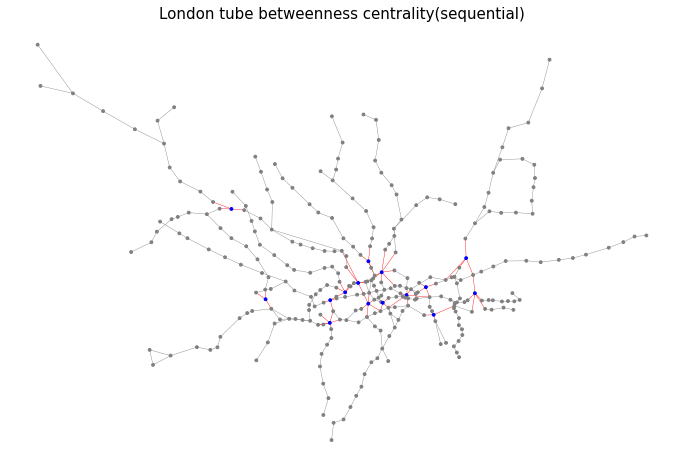

In [56]:

node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in between_node:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(between_node):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)


plt.axis("off")
plt.title("London tube betweenness centrality(sequential)",fontsize=15)


plt.savefig('between_centrality_sequen_20.png')

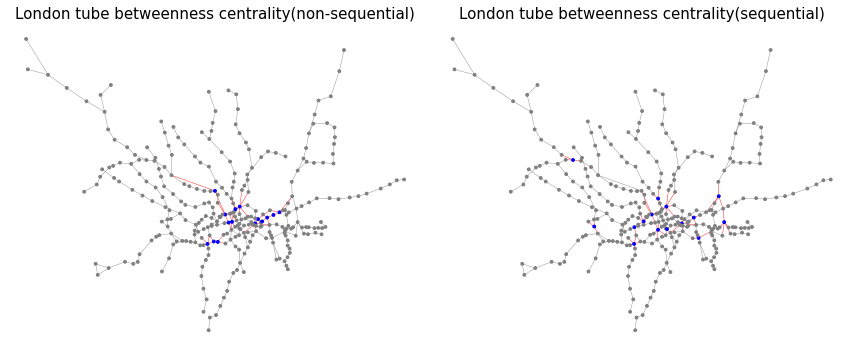

In [57]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_between1[0:15]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_between1[0:15]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:



node_color1=[]
edge_color1 = []
for node in g_shp_un.nodes(data = True):
    if node[0] in between_node:
        node_color1.append('blue')
    else:
        node_color1.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(between_node):
        edge_color1.append('red')
    else:
        edge_color1.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, axes = plt.subplots(1, 2,figsize=(12,5))
ax = axes.flatten()
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4,ax=ax[0])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8,ax=ax[0])


ax[0].set_axis_off()
ax[0].set_title("London tube betweenness centrality(non-sequential)",fontsize=15)
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color1, 
        width=0.4,ax=ax[1])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color1,
        node_size= 8,ax=ax[1])

ax[1].set_axis_off()
ax[1].set_title("London tube betweenness centrality(sequential)",fontsize=15)
fig.tight_layout()
plt.savefig('between_centrality_se_unse.png')

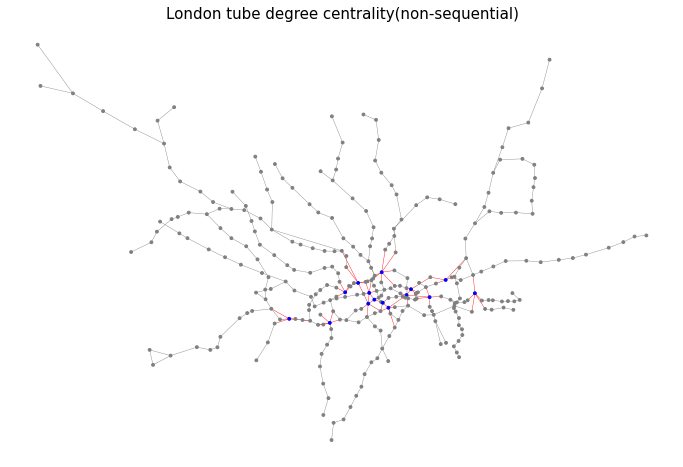

In [58]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_degree1[0:15]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_degree1[0:15]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)

plt.axis("off")
plt.title("London tube degree centrality(non-sequential)",fontsize=15)


plt.savefig('degree_centrality_unsequen_20.png')

In [59]:
degree_node

[0, 88, 10, 24, 116, 7, 25, 112, 155, 158, 26, 32, 39, 60, 96]

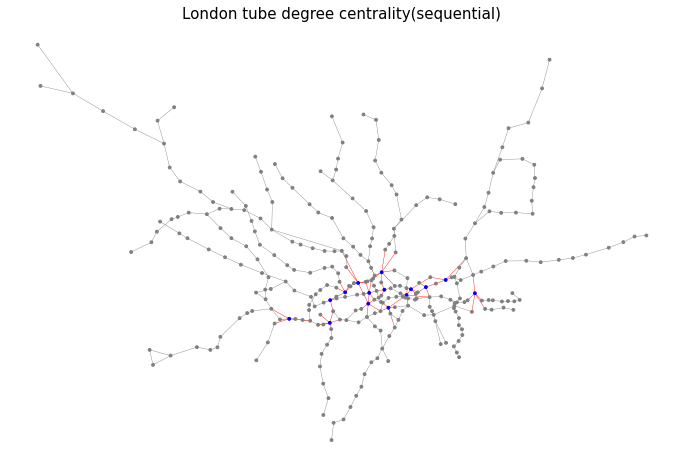

In [60]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in degree_node:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(degree_node):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}
fig, ax = plt.subplots(figsize=(12,8))


nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8)


plt.axis("off")
plt.title("London tube degree centrality(sequential)",fontsize=15)


plt.savefig('degree_centrality_sequen_20.png')

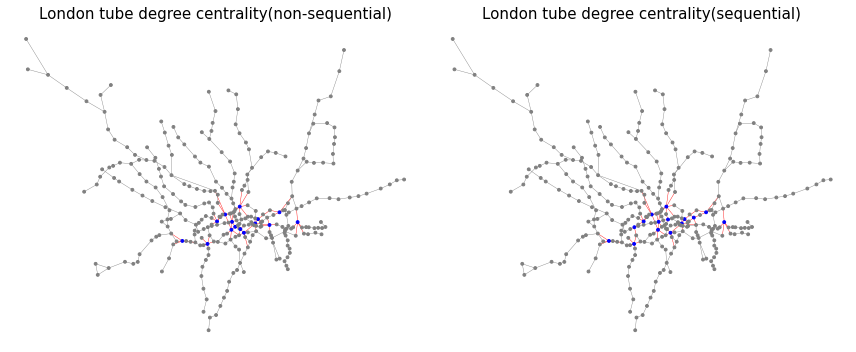

In [61]:
node_color=[]
edge_color = []
for node in g_shp_un.nodes(data = True):
    if node[0] in list_degree1[0:15]:
        node_color.append('blue')
    else:
        node_color.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(list_degree1[0:15]):
        edge_color.append('red')
    else:
        edge_color.append('grey')

#add edges linking nodes:



node_color1=[]
edge_color1 = []
for node in g_shp_un.nodes(data = True):
    if node[0] in degree_node:
        node_color1.append('blue')
    else:
        node_color1.append('grey')
for edge in g_shp_un.edges:
    if edge in g_shp_un.edges(degree_node):
        edge_color1.append('red')
    else:
        edge_color1.append('grey')

#add edges linking nodes:

pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, axes = plt.subplots(1, 2,figsize=(12,5))
ax = axes.flatten()
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color, 
        width=0.4,ax=ax[0])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color,
        node_size= 8,ax=ax[0])


ax[0].set_axis_off()
ax[0].set_title("London tube degree centrality(non-sequential)",fontsize=15)
nx.draw_networkx_edges(g_shp_un, pos,edge_color=edge_color1, 
        width=0.4,ax=ax[1])
nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= node_color1,
        node_size= 8,ax=ax[1])

ax[1].set_axis_off()
ax[1].set_title("London tube degree centrality(sequential)",fontsize=15)
fig.tight_layout()
plt.savefig('degree_centrality_se_unse.png')

Text(0.5, 1.0, 'Degree Histogram')

<Figure size 864x576 with 0 Axes>

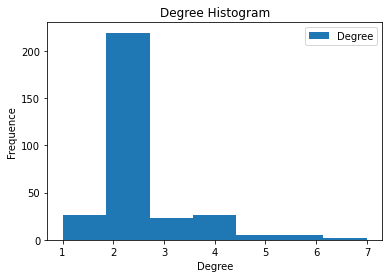

In [62]:
import pandas as pd

# We can plot the histogram of the degrees:


df=pd.DataFrame(list(nx.degree(g_shp_un)),columns=['Node','Degree']).set_index('Node')
df

plt.figure(figsize=(12, 8))
ax = df.plot.hist(bins=7, alpha=1)

plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.title("Degree Histogram")


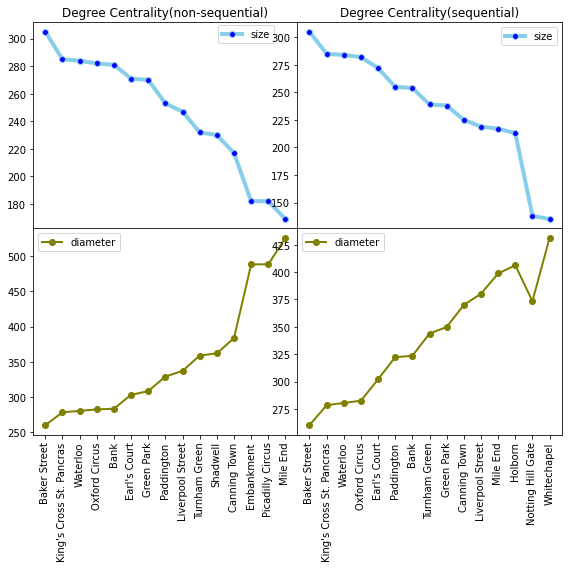

In [63]:
fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax2, ax4) = gs.subplots(sharex='col')
# multiple line plots
ax1.plot( 'station', 'size', data=degree_unse, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax2.plot( 'station', 'diameter', data=degree_unse, marker='o',color='olive', linewidth=2)

# show legend
ax1.legend(loc=(0.7, 0.9))
ax2.legend()

ax2.tick_params('x', labelrotation=90)
ax1.set_title('Degree Centrality(non-sequential)')
# multiple line plots
ax3.plot( 'station', 'size', data=degree_se, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax4.plot( 'station', 'diameter', data=degree_se, marker='o', color='olive', linewidth=2)
ax3.legend()
ax4.legend()
ax4.tick_params('x', labelrotation=90)
ax3.set_title('Degree Centrality(sequential)')
# show graph
fig.tight_layout()


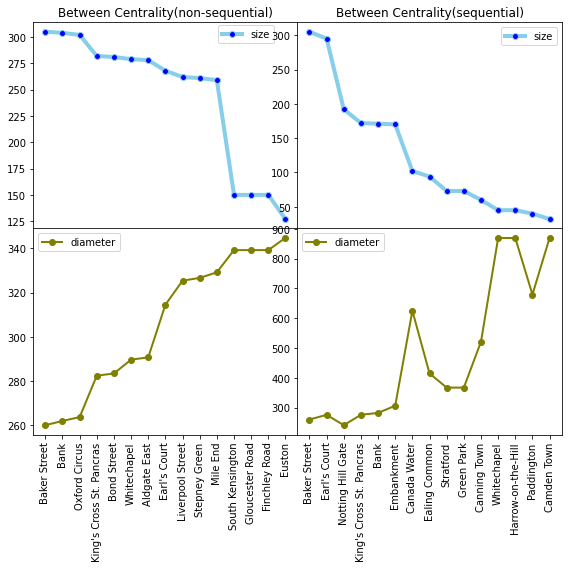

In [64]:
fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax2, ax4) = gs.subplots(sharex='col')
# multiple line plots
ax1.plot( 'station', 'size', data=between_unse, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax2.plot( 'station', 'diameter', data=between_unse, marker='o',color='olive', linewidth=2)

# show legend
ax1.legend(loc=(0.7, 0.9))
ax2.legend()

ax2.tick_params('x', labelrotation=90)
ax1.set_title('Between Centrality(non-sequential)')
# multiple line plots
ax3.plot( 'station', 'size', data=between_se, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax4.plot( 'station', 'diameter', data=between_se, marker='o', color='olive', linewidth=2)
ax3.legend()
ax4.legend()
ax4.tick_params('x', labelrotation=90)
ax3.set_title('Between Centrality(sequential)')
# show graph
fig.tight_layout()



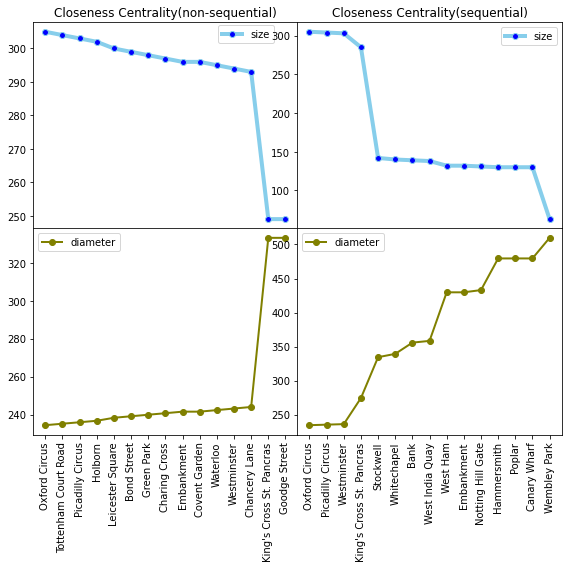

In [65]:

fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax2, ax4) = gs.subplots(sharex='col')
# multiple line plots
ax1.plot( 'station', 'size', data=clos_unse, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax2.plot( 'station', 'diameter', data=clos_unse, marker='o',color='olive', linewidth=2)

# show legend
ax1.legend(loc=(0.7, 0.9))
ax2.legend()

ax2.tick_params('x', labelrotation=90)
ax1.set_title('Closeness Centrality(non-sequential)')
# multiple line plots
ax3.plot( 'station', 'size', data=clos_se, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax4.plot( 'station', 'diameter', data=clos_se, marker='o', color='olive', linewidth=2)
ax3.legend()
ax4.legend()
ax4.tick_params('x', labelrotation=90)
ax3.set_title('Closeness Centrality(sequential)')
# show graph
fig.tight_layout()



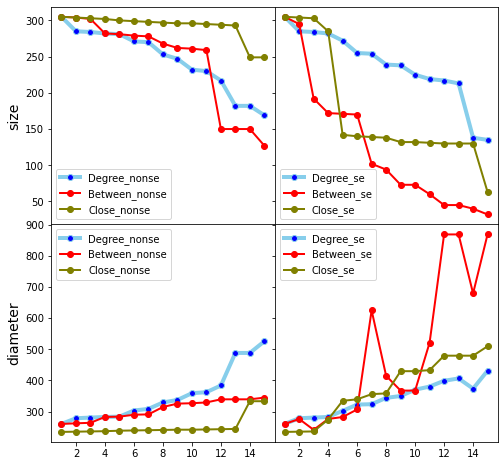

In [66]:
from matplotlib.ticker import MaxNLocator
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

ax1.plot(x,'size',data=degree_unse,marker='o', markerfacecolor='blue', color='skyblue', linewidth=4,label = 'Degree_nonse')
ax1.plot(x,'size',data=between_unse,marker='o', color='red', linewidth=2,label = 'Between_nonse')
ax1.plot(x,'size',data=clos_unse,marker='o', color='olive', linewidth=2,label = 'Close_nonse')
ax2.plot(x,'size',data=degree_se,marker='o', markerfacecolor='blue', color='skyblue', linewidth=4,label = 'Degree_se')
ax2.plot(x,'size',data=between_se,marker='o', color='red', linewidth=2,label = 'Between_se')
ax2.plot(x,'size',data=clos_se,marker='o', color='olive', linewidth=2,label = 'Close_se')
ax1.set_ylabel('size',size = 14)

ax1.legend()
ax2.legend(loc = 'lower left')

ax3.plot(x,'diameter',data=degree_unse,marker='o', markerfacecolor='blue', color='skyblue', linewidth=4,label = 'Degree_nonse')
ax3.plot(x,'diameter',data=between_unse,marker='o', color='red', linewidth=2,label = 'Between_nonse')
ax3.plot(x,'diameter',data=clos_unse,marker='o', color='olive', linewidth=2,label = 'Close_nonse')
ax4.plot(x,'diameter',data=degree_se,marker='o', markerfacecolor='blue', color='skyblue', linewidth=4,label = 'Degree_se')
ax4.plot(x,'diameter',data=between_se,marker='o', color='red', linewidth=2,label = 'Between_se')
ax4.plot(x,'diameter',data=clos_se,marker='o', color='olive', linewidth=2,label = 'Close_se')
ax3.set_ylabel('diameter',size = 14)
ax3.legend(loc = 'upper left')
ax4.legend(loc = 'upper left')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('remove.png')

# Part 2

In [67]:
# Read Origin-Destination table from the csv
orig_dest = pd.read_csv('ODtube2017.csv')
orig_dest.head()

,From,station_name,To,station_name.1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9


In [68]:
#Later when using the Commuters data we will have an issue mapping node 'Heathrow Terminals 1, 2 & 3', 
#so we are going to rename it here:
#1. find the node 'Heathrow Terminals 1, 2 & 3'
nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
nodes

[(258, 'Heathrow Terminals 1, 2 & 3'), (259, 'Heathrow Terminal 4')]

In [69]:
#2.Rename it with the name given by the the commuters file (see later):
g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

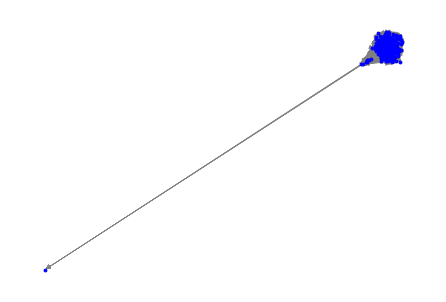

In [70]:
#This can be seen as a network by itself:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'],create_using = nx.DiGraph)

# Plot graph
nx.draw(g_OD,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)

In [71]:
list(g_OD.edges(data = True))[0:10]

[('Acton Town', 'Alperton', {'total_wtrips': 143}),
 ('Acton Town', 'Amersham', {'total_wtrips': 22}),
 ('Acton Town', 'Angel', {'total_wtrips': 15}),
 ('Acton Town', 'Archway', {'total_wtrips': 9}),
 ('Acton Town', 'Arsenal', {'total_wtrips': 9}),
 ('Acton Town', 'Baker Street', {'total_wtrips': 19}),
 ('Acton Town', 'Bank', {'total_wtrips': 226}),
 ('Acton Town', 'Barbican', {'total_wtrips': 7}),
 ('Acton Town', 'Barons Court', {'total_wtrips': 36}),
 ('Acton Town', 'Bayswater', {'total_wtrips': 2})]

In [72]:
#Change the names of nodes by the id in g_shp_un (tube network):

#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
print(list(g_OD.nodes(data=True))[:10])

[('Acton Town', {'station': 'Acton Town'}), ('Alperton', {'station': 'Alperton'}), ('Amersham', {'station': 'Amersham'}), ('Angel', {'station': 'Angel'}), ('Archway', {'station': 'Archway'}), ('Arsenal', {'station': 'Arsenal'}), ('Baker Street', {'station': 'Baker Street'}), ('Bank', {'station': 'Bank'}), ('Barbican', {'station': 'Barbican'}), ('Barons Court', {'station': 'Barons Court'})]


In [73]:
#2.Do the mapping with id in g_shp_un
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()}
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])

[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


In [74]:
#and we can add coodenates to the nodes, from the shapefile of the tube network:
nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')}

nx.set_node_attributes(g_OD,nod_coords,'station_coord') #with nod_id1 or nod_id2 is enought

pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}


In [75]:
print(list(g_OD.edges(data=True))[:10])

[(111, 238, {'total_wtrips': 143}), (111, 172, {'total_wtrips': 22}), (111, 196, {'total_wtrips': 15}), (111, 198, {'total_wtrips': 9}), (111, 244, {'total_wtrips': 9}), (111, 0, {'total_wtrips': 19}), (111, 25, {'total_wtrips': 226}), (111, 77, {'total_wtrips': 7}), (111, 100, {'total_wtrips': 36}), (111, 80, {'total_wtrips': 2})]


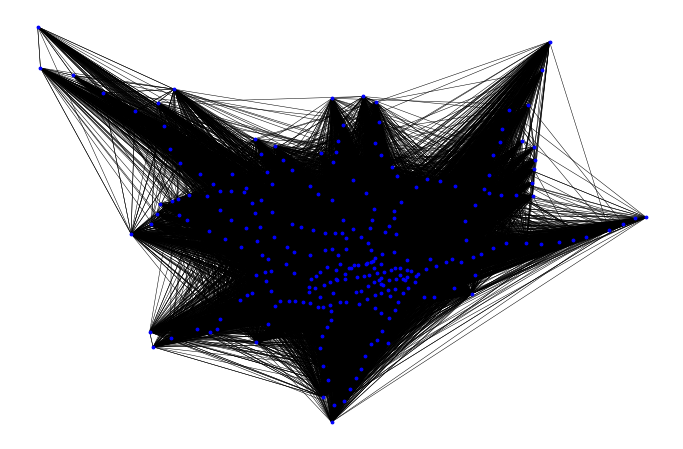

In [76]:
#To finaly plot the OD matrix as a network:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_OD,g_OD.nodes(data='station_coord'),node_size=8,node_color='b')
nx.draw_networkx_edges(g_OD,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()



In [77]:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))

#Fill the adjacency matrix with Origin-Destination flows:
#From origin to destination with x commuters, we will compute the shortest path and fill the number of commuters
#for each pair of stations they go through:
for e1,e2,C in g_OD.edges(data='total_wtrips'):
    path = nx.dijkstra_path(g_shp_un,e1,e2)  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:])) #list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C #sum the contribution of the OD flow to all edges in the shortest path
adj_c

array([[    0., 15400., 36470., ...,     0.,     0.,     0.],
       [15035.,     0.,     0., ...,     0.,     0.,     0.],
       [19675.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [78]:
#Create the new graph from the adjancency matrix:
g_flows=nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)


In [79]:
#we need to give coordinates to these nodes too:
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226)}),
 (1, {'station_coord': (-0.1631, 51.5225)}),
 (2, {'station_coord': (-0.1466, 51.5234)}),
 (3, {'station_coord': (-0.1247, 51.508)}),
 (4, {'station_coord': (-0.1223, 51.5074)}),
 (5, {'station_coord': (-0.1342, 51.5098)}),
 (6, {'station_coord': (-0.1679, 51.5199)}),
 (7, {'station_coord': (-0.1755, 51.5154)}),
 (8, {'station_coord': (-0.1001, 51.4943)}),
 (9, {'station_coord': (-0.1115, 51.4991)})]

In [80]:
#also the station names:
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_names,'station')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"}),
 (3, {'station_coord': (-0.1247, 51.508), 'station': 'Charing Cross'}),
 (4, {'station_coord': (-0.1223, 51.5074), 'station': 'Embankment'}),
 (5, {'station_coord': (-0.1342, 51.5098), 'station': 'Picadilly Circus'}),
 (6, {'station_coord': (-0.1679, 51.5199), 'station': 'Edgware Road (B)'}),
 (7, {'station_coord': (-0.1755, 51.5154), 'station': 'Paddington'}),
 (8, {'station_coord': (-0.1001, 51.4943), 'station': 'Elephant & Castle'}),
 (9, {'station_coord': (-0.1115, 51.4991), 'station': 'Lambeth North'})]

In [81]:
# Lets set colour and size of nodes according to the flows_

weights={(e1, e2):round(1./w,7) for e1, e2, w in g_flows.edges(data='weight')}
# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(g_flows, weights, 'weights')
list(g_flows.edges(data = True))[0:10]

[(0, 1, {'weight': 15400.0, 'weights': 6.49e-05}),
 (0, 2, {'weight': 36470.0, 'weights': 2.74e-05}),
 (0, 33, {'weight': 122309.0, 'weights': 8.2e-06}),
 (0, 75, {'weight': 98801.0, 'weights': 1.01e-05}),
 (0, 76, {'weight': 71061.0, 'weights': 1.41e-05}),
 (0, 152, {'weight': 12394.0, 'weights': 8.07e-05}),
 (0, 165, {'weight': 77251.0, 'weights': 1.29e-05}),
 (1, 0, {'weight': 15035.0, 'weights': 6.65e-05}),
 (1, 6, {'weight': 5231.0, 'weights': 0.0001912}),
 (2, 0, {'weight': 19675.0, 'weights': 5.08e-05})]

In [82]:
#as edges are saved using the IDs, let us create an edges attribute with the station names:
edges_names={(e1,e2):(g_flows.nodes[e1]['station'],g_flows.nodes[e2]['station']) for e1,e2 in g_flows.edges()}

nx.set_edge_attributes(g_flows,edges_names,'station_names') 
print(list(g_flows.edges(data=True))[0:10])

[(0, 1, {'weight': 15400.0, 'weights': 6.49e-05, 'station_names': ('Baker Street', 'Marylebone')}), (0, 2, {'weight': 36470.0, 'weights': 2.74e-05, 'station_names': ('Baker Street', "Regent's Park")}), (0, 33, {'weight': 122309.0, 'weights': 8.2e-06, 'station_names': ('Baker Street', 'Bond Street')}), (0, 75, {'weight': 98801.0, 'weights': 1.01e-05, 'station_names': ('Baker Street', 'Edgware Road (C)')}), (0, 76, {'weight': 71061.0, 'weights': 1.41e-05, 'station_names': ('Baker Street', 'Great Portland Street')}), (0, 152, {'weight': 12394.0, 'weights': 8.07e-05, 'station_names': ('Baker Street', "St. John's Wood")}), (0, 165, {'weight': 77251.0, 'weights': 1.29e-05, 'station_names': ('Baker Street', 'Finchley Road')}), (1, 0, {'weight': 15035.0, 'weights': 6.65e-05, 'station_names': ('Marylebone', 'Baker Street')}), (1, 6, {'weight': 5231.0, 'weights': 0.0001912, 'station_names': ('Marylebone', 'Edgware Road (B)')}), (2, 0, {'weight': 19675.0, 'weights': 5.08e-05, 'station_names': ("R

In [83]:
# To check an specific edge data attribute:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
flow=np.zeros((N, N))



for e1,e2,C in g_OD.edges(data='total_wtrips'):
    flow[e1,e2] = g_OD.edges[e1,e2]['total_wtrips']

In [84]:
pop = np.sum(flow, axis=1) 
job = np.sum(flow, axis=0) 

In [85]:
pop = {v: k for v, k in enumerate(pop)}
job = {v: k for v, k in enumerate(job)}

In [86]:
sum = 0
for i in range(N):
    sum = sum + flow[i,2]
sum

3965.0

In [87]:
nx.set_node_attributes(g_flows,pop,'pop') 
nx.set_node_attributes(g_flows,job,'job') 

In [88]:
print(list(g_flows.nodes(data=True))[0:10])

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street', 'pop': 24812.0, 'job': 26814.0}), (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone', 'pop': 12576.0, 'job': 12652.0}), (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park", 'pop': 3128.0, 'job': 3965.0}), (3, {'station_coord': (-0.1247, 51.508), 'station': 'Charing Cross', 'pop': 15330.0, 'job': 17958.0}), (4, {'station_coord': (-0.1223, 51.5074), 'station': 'Embankment', 'pop': 15667.0, 'job': 21813.0}), (5, {'station_coord': (-0.1342, 51.5098), 'station': 'Picadilly Circus', 'pop': 21228.0, 'job': 31758.0}), (6, {'station_coord': (-0.1679, 51.5199), 'station': 'Edgware Road (B)', 'pop': 4066.0, 'job': 4474.0}), (7, {'station_coord': (-0.1755, 51.5154), 'station': 'Paddington', 'pop': 44723.0, 'job': 47064.0}), (8, {'station_coord': (-0.1001, 51.4943), 'station': 'Elephant & Castle', 'pop': 17915.0, 'job': 14986.0}), (9, {'station_coord': (-0.1115, 51.4991), 'station': 'Lambeth North'

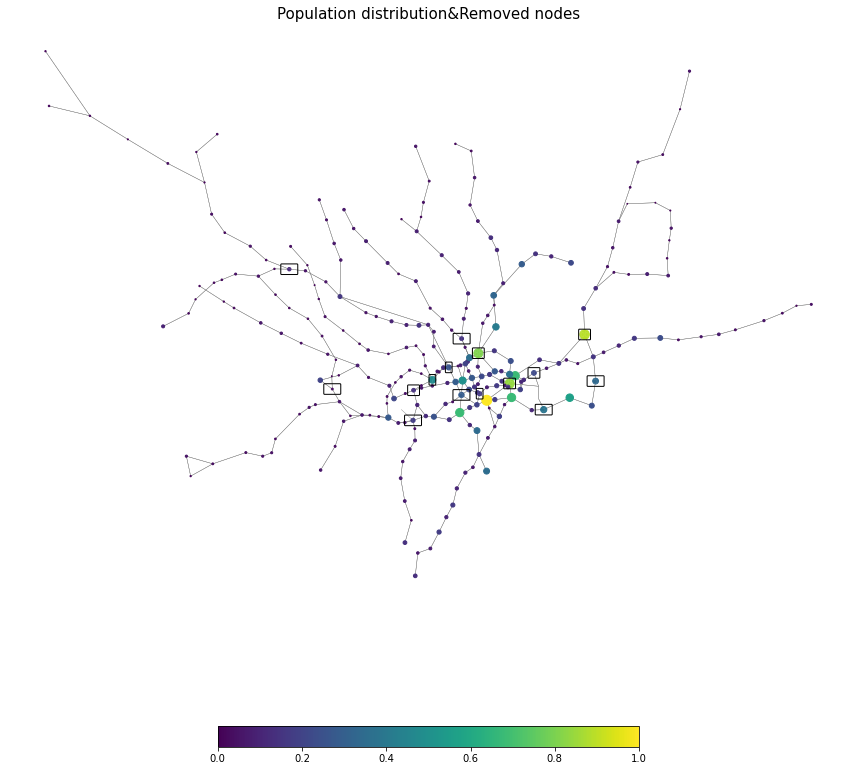

In [89]:
node_values=[(i[1]['pop']) for i in g_flows.nodes(data=True)]
node_color=[i[1]['pop']/max(node_values)*100 for i in g_flows.nodes(data=True)]
node_size=[i[1]['pop']/max(node_values)*100 for i in g_flows.nodes(data=True)]

# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4,arrows = False)
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= node_color,
        node_size= node_size)
subnodelist = between_node
labels = {k:k for k in subnodelist}    

nx.draw_networkx_labels(g_flows, pos, labels = labels,font_size=8,font_color = 'white',alpha = 0.1,bbox=dict(facecolor="none", edgecolor='black', boxstyle='round,pad=0.1'))

plt.colorbar(nod,label=None,orientation="horizontal", shrink=0.5)
plt.axis("off")

plt.title("Population distribution&Removed nodes",fontsize=15)

# show graph
fig.tight_layout()
plt.savefig('pop.png')

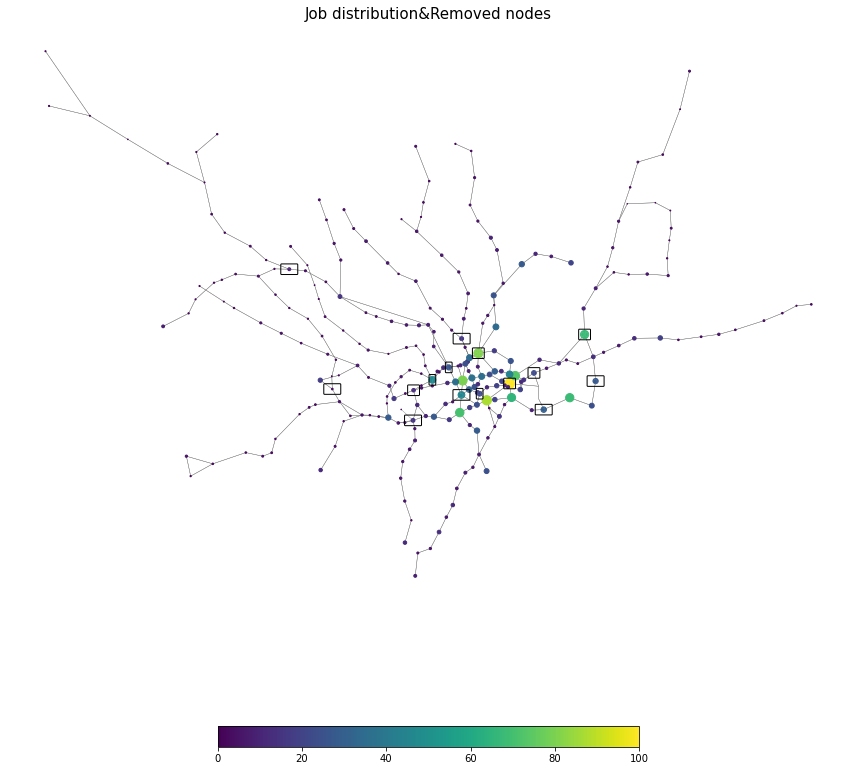

In [90]:
node_values=[(i[1]['job']) for i in g_flows.nodes(data=True)]
node_color=[i[1]['job']/max(node_values)*100 for i in g_flows.nodes(data=True)]
node_size=[i[1]['job']/max(node_values)*100 for i in g_flows.nodes(data=True)]

# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4,arrows = False)
nod=nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= node_color,
        node_size= node_size)
subnodelist = between_node
labels = {k:k for k in subnodelist}    

nx.draw_networkx_labels(g_flows, pos, labels = labels,font_size=8,font_color = 'white',alpha = 0.1,bbox=dict(facecolor="none", edgecolor='black', boxstyle='round,pad=0.1'))

plt.colorbar(nod,label=None,orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Job distribution&Removed nodes",fontsize=15)

# show graph
fig.tight_layout()


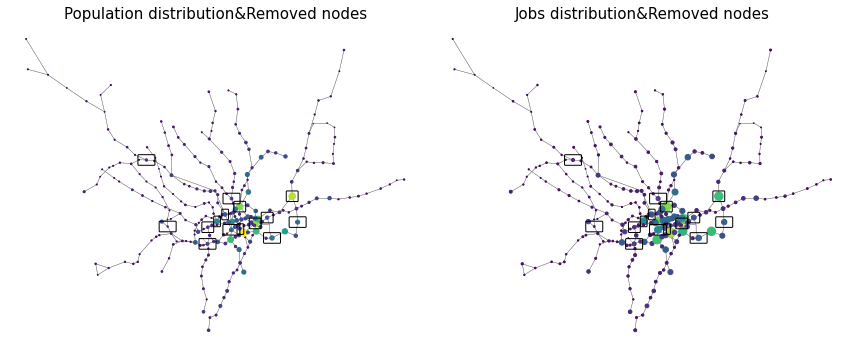

In [91]:
node_values=[(i[1]['pop']) for i in g_flows.nodes(data=True)]
node_color=[i[1]['pop']/max(node_values) for i in g_flows.nodes(data=True)]
node_size=[i[1]['pop']/max(node_values)*50 for i in g_flows.nodes(data=True)]

# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}


fig, axes = plt.subplots(1, 2,figsize=(12,5))
ax = axes.flatten()

nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4,arrows = False,ax=ax[0])
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= node_color,
        node_size= node_size,ax=ax[0])
subnodelist = between_node
labels = {k:k for k in subnodelist}    

nx.draw_networkx_labels(g_flows, pos, labels = labels,font_size=8,font_color = 'white',alpha = 0.1,bbox=dict(facecolor="none", edgecolor='black', boxstyle='round,pad=0.1'),ax=ax[0])


ax[0].set_axis_off()
ax[0].set_title("Population distribution&Removed nodes",fontsize=15)


node_values1=[(i[1]['job']) for i in g_flows.nodes(data=True)]
node_color1=[i[1]['job']/max(node_values)*100 for i in g_flows.nodes(data=True)]
node_size1=[i[1]['job']/max(node_values)*100 for i in g_flows.nodes(data=True)]



nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4,arrows = False,ax=ax[1])
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= node_color1,
        node_size= node_size1,ax=ax[1])
subnodelist1 = between_node
labels1 = {k:k for k in subnodelist1}    

nx.draw_networkx_labels(g_flows, pos, labels = labels1,font_size=8,font_color = 'white',alpha = 0.1,bbox=dict(facecolor="none", edgecolor='black', boxstyle='round,pad=0.1'),ax=ax[1])


ax[1].set_axis_off()
ax[1].set_title("Jobs distribution&Removed nodes",fontsize=15)
# show graph
fig.tight_layout()






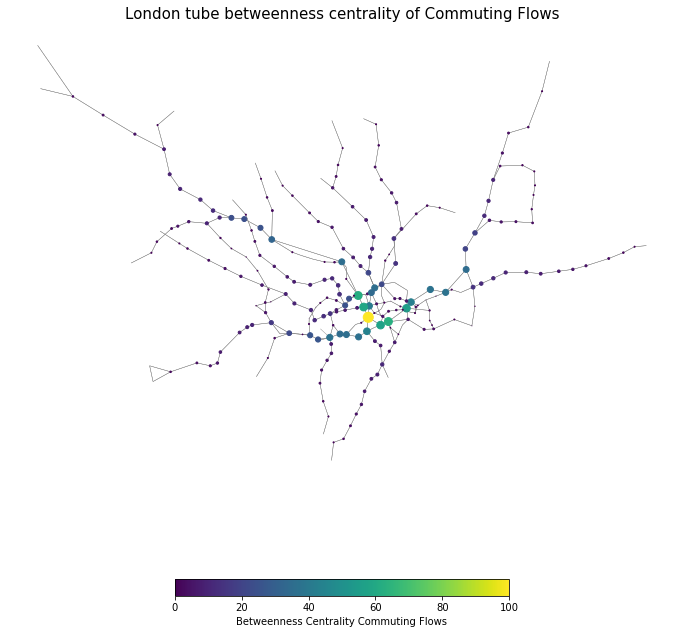

In [92]:
#now let us compute betweenness centrality for directed commuting flows:
bet_london_w=nx.betweenness_centrality(g_flows, weight='weights', normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows,bet_london_w,'betweenness_flows')

betweenness_w_values=[(i[1]['betweenness_flows']) for i in g_flows.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_flows']/max(betweenness_w_values)) for i in g_flows.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_flows']/max(betweenness_w_values)*100) for i in g_flows.nodes(data=True)]

# Plot graph
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color='gray', width=0.4,arrows = False)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.axis("off")
plt.colorbar(nod,label="Betweenness Centrality Commuting Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality of Commuting Flows",fontsize=15)
plt.show()

In [93]:
between_station_flow = []
between_trend_flow = []
between_node_flow = []
between_path_flow = []
between_diameter_flow = []
between_path_norm_flow = []
between_diameter_norm_flow = []
between_cluster_flow = []
between_aver_deg_flow =[]
G = copy.deepcopy(g_flows)
for i in range(0,15):

    bet_london_w=nx.betweenness_centrality(G, weight='weights', normalized=False)
    nx.set_node_attributes(G,bet_london_w,'betweenness_un')
    dict_un=dict(G.nodes(data=True))
    
    between_node_flow.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][0])
    between_station_flow.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][1].get('station'))
    G.remove_node(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True)).items())[0][0])
    Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    degrees = [val for (node, val) in G.degree()]

    between_trend_flow.append(len(G0))
    between_path_flow.append(nx.average_shortest_path_length(G0,weight='distance'))
    between_path_norm_flow.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    between_diameter_flow.append(d)
    between_diameter_norm_flow.append(d/len(G0))
    between_cluster_flow.append(nx.average_clustering(G))
    
    

0
155
267
1
88
249
2
25
248
3
10
247
4
116
238
5
60
237
6
24
126
7
4
110
8
0
102
9
115
91
10
66
70
11
109
57
12
221
45
13
184
45
14
101
35


In [94]:
between_se_flow = pd.DataFrame({'station':between_station_flow[0:15] ,'size': between_trend_flow,'diameter': between_diameter_norm_flow})

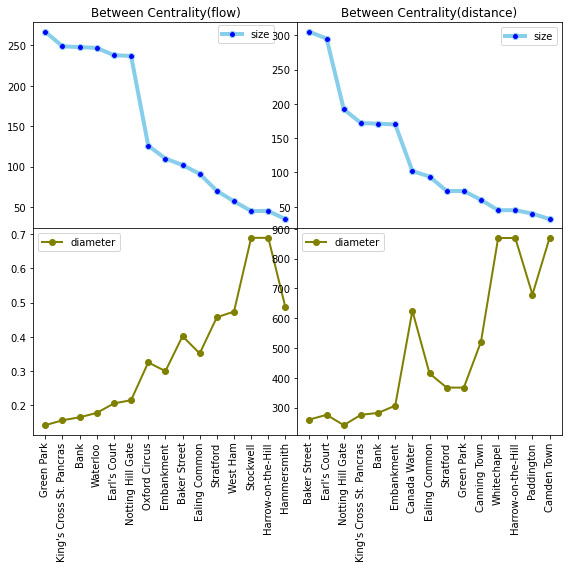

In [95]:
fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax2, ax4) = gs.subplots(sharex='col')
# multiple line plots
ax1.plot( 'station', 'size', data=between_se_flow, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax2.plot( 'station', 'diameter', data=between_se_flow, marker='o',color='olive', linewidth=2)

# show legend
ax1.legend(loc=(0.7, 0.9))
ax2.legend()

ax2.tick_params('x', labelrotation=90)
ax1.set_title('Between Centrality(flow)')

ax3.plot( 'station', 'size', data=between_se, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax4.plot( 'station', 'diameter', data=between_se, marker='o', color='olive', linewidth=2)
ax3.legend()
ax4.legend()
ax4.tick_params('x', labelrotation=90)
ax3.set_title('Between Centrality(distance)')
# show graph
fig.tight_layout()


In [96]:
clos_station_flow = []
clos_trend_flow = []
clos_node_flow = []
clos_path_flow = []
clos_diameter_flow = []
clos_path_norm_flow = []
clos_diameter_norm_flow = []
clos_cluster_flow = []
clos_aver_deg_flow =[]
G = copy.deepcopy(g_flows)

for i in range(0,15):
    clos=nx.closeness_centrality(G, distance='weights')
    nx.set_node_attributes(G,clos,'closeness')
    dict_un=dict(G.nodes(data=True))
    
    clos_node_flow.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][0])
    clos_station_flow.append(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][1].get('station'))
    G.remove_node(list(OrderedDict(sorted(dict_un.items(), key=lambda x: x[1]['closeness'],reverse=True)).items())[0][0])
    Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    degrees = [val for (node, val) in G.degree()]

    clos_trend_flow.append(len(G0))
    clos_path_flow.append(nx.average_shortest_path_length(G0,weight='distance'))
    clos_path_norm_flow.append(nx.average_shortest_path_length(G0,weight='distance')/len(G0))
    nlen = {n:nx.single_source_dijkstra_path_length(G0, n, weight='distance') for n in G0.nodes() }
    e = nx.eccentricity(G0,sp=nlen)
    d = nx.diameter(G0, e)
    clos_diameter_flow.append(d)
    clos_diameter_norm_flow.append(d/len(G0))
    clos_cluster_flow.append(nx.average_clustering(G))

0
155
267
1
25
266
2
24
265
3
0
263
4
218
262
5
94
261
6
93
138
7
26
122
8
88
122
9
109
122
10
101
120
11
115
68
12
60
68
13
34
68
14
116
68


In [97]:
clos_se_flow = pd.DataFrame({'station':clos_station_flow[0:15],'size':clos_trend_flow,'diameter':clos_diameter_norm_flow})

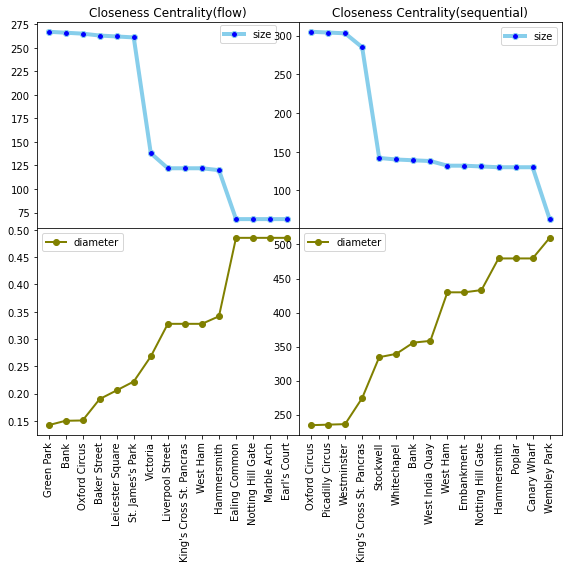

In [98]:

fig= plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax3), (ax2, ax4) = gs.subplots(sharex='col')
# multiple line plots
ax1.plot( 'station', 'size', data=clos_se_flow, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax2.plot( 'station', 'diameter', data=clos_se_flow, marker='o',color='olive', linewidth=2)

# show legend
ax1.legend(loc=(0.7, 0.9))
ax2.legend()

ax2.tick_params('x', labelrotation=90)
ax1.set_title('Closeness Centrality(flow)')
# multiple line plots
ax3.plot( 'station', 'size', data=clos_se, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
ax4.plot( 'station', 'diameter', data=clos_se, marker='o', color='olive', linewidth=2)
ax3.legend()
ax4.legend()
ax4.tick_params('x', labelrotation=90)
ax3.set_title('Closeness Centrality(sequential)')
# show graph
fig.tight_layout()



In [99]:
nx.set_node_attributes(g_OD,pop,'pop') 
nx.set_node_attributes(g_OD,job,'job') 

In [100]:
for e1,e2,C in g_OD.edges(data=True):
    g_OD[e1][e2].update({'ori_pop':g_OD.nodes[e1]['pop']}) 

In [101]:
for e1,e2,C in g_OD.edges(data=True):
    g_OD[e1][e2].update({'des_job':g_OD.nodes[e2]['job']}) 

In [102]:
for e1,e2,C in g_flows.edges(data=True):
    g_flows[e1][e2].update({'ori_pop':g_flows.nodes[e1]['pop']}) 
    
for e1,e2,C in g_flows.edges(data=True):
    g_flows[e1][e2].update({'des_job':g_flows.nodes[e2]['job']}) 

In [103]:
for e1,e2,C in g_OD.edges(data=True):
    g_OD[e1][e2].update({'ori_station':g_OD.nodes[e1]['station']}) 
    
for e1,e2,C in g_OD.edges(data=True):
    g_OD[e1][e2].update({'des_station':g_OD.nodes[e2]['station']}) 

In [104]:
for e1,e2,C in g_OD.edges(data=True):
    try:
        g_flows[e1][e2].update({'flows':g_OD[e1][e2]['total_wtrips']})
        
    except KeyError:
        continue
 

In [106]:
def Reverse(tuples):
    new_tup = tuples[::-1]
    return new_tup


In [107]:
Reverse(g_OD.nodes[1]['station_coord'])

(51.5225, -0.1631)

In [108]:
import geopy.distance

for e1,e2,C in g_flows.edges(data=True):
    g_flows[e1][e2].update({'distance':geopy.distance.GeodesicDistance(Reverse(g_flows.nodes[e1]['station_coord']),Reverse(g_flows.nodes[e2]['station_coord'])).m}) 


In [109]:
import geopy.distance

for e1,e2,C in g_OD.edges(data=True):
    g_OD[e1][e2].update({'true_distance':nx.dijkstra_path_length(g_flows,e1,e2,weight='distance')}) 


In [112]:
ori_station = []
des_station = []
total_trips = []
distance = []
ori_pop = []
des_jobs = []

for e1,e2,C in g_OD.edges(data=True):
    ori_station.append(g_OD[e1][e2]['ori_station'])
    des_station.append(g_OD[e1][e2]['des_station'])
    ori_pop.append(g_OD[e1][e2]['ori_pop'])
    des_jobs.append(g_OD[e1][e2]['des_job'])
    distance.append(g_OD[e1][e2]['true_distance'])
    total_trips.append(g_OD[e1][e2]['total_wtrips'])
    


In [113]:
log_dis = np.log(distance)

In [114]:
log_ori_pop = np.log(ori_pop)

In [116]:
d = {'ori_station': ori_station, 'des_station': des_station,'total_trips':total_trips,'distance':distance,'log_dis':log_dis,'ori_pop':ori_pop,'des_jobs':des_jobs,'log_ori_pop':log_ori_pop}
df = pd.DataFrame(data=d)
df

,ori_station,des_station,total_trips,distance,log_dis,ori_pop,des_jobs,log_ori_pop
0,Acton Town,Alperton,143,4785.556297,8.473358,5910.0,2961.0,8.684401
1,Acton Town,Amersham,22,36052.719259,10.492738,5910.0,1384.0,8.684401
2,Acton Town,Angel,15,14868.355669,9.606990,5910.0,17683.0,8.684401
3,Acton Town,Archway,9,17188.348797,9.751987,5910.0,7388.0,8.684401
4,Acton Town,Arsenal,9,17036.911892,9.743138,5910.0,1857.0,8.684401
...,...,...,...,...,...,...,...,...
33966,Upminster Bridge,Waterloo,29,25649.880704,10.152294,1482.0,87309.0,7.301148
33967,Upminster Bridge,West Brompton,2,32282.729666,10.382288,1482.0,4854.0,7.301148
33968,Upminster Bridge,West Ham,24,16391.363195,9.704510,1482.0,13975.0,7.301148
33969,Upminster Bridge,Westminster,1,26473.126971,10.183885,1482.0,24164.0,7.301148


In [117]:
df.to_csv('data.csv',index=False)

In [118]:
df = pd.read_csv('data.csv')  

In [119]:
len(g_OD.edges)

33971

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [121]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [122]:
cdatasubmat = pd.pivot_table(df, values ="total_trips", index="ori_station", columns = "des_station",
                            aggfunc=np.sum, margins=True)
cdatasubmat

des_station,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
ori_station,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,143.0,22.0,15.0,9.0,NaN,9.0,19.0,...,NaN,10.0,0.0,NaN,71.0,97.0,27.0,NaN,NaN,5910
Aldgate,0.0,NaN,NaN,NaN,0.0,46.0,12.0,22.0,0.0,271.0,...,NaN,NaN,18.0,NaN,7.0,NaN,43.0,4.0,0.0,9974
Aldgate East,22.0,NaN,NaN,NaN,NaN,121.0,0.0,0.0,NaN,21.0,...,8.0,592.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,11556
Alperton,192.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,49.0,NaN,0.0,NaN,NaN,3084
Amersham,NaN,52.0,NaN,83.0,NaN,4.0,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,24.0,0.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,533.0,NaN,NaN,NaN,NaN,2504
Wood Green,NaN,8.0,60.0,27.0,NaN,99.0,NaN,231.0,0.0,35.0,...,45.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,12714
Woodford,NaN,19.0,68.0,NaN,NaN,19.0,0.0,NaN,NaN,36.0,...,44.0,206.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,7002


In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'total_trips ~ des_station + ori_station + log_dis-1'
#run a production constrained sim
doubSim = smf.glm(formula = dbl_form, data=df, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

In [124]:
#get the estimates
df["doubsimfitted"] = np.round(doubSim.predict())
#here's the matrix
cdatasubmat7 = df.pivot_table(values ="doubsimfitted", index="ori_station", columns = "des_station",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7



des_station,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
ori_station,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,47.0,10.0,36.0,22.0,NaN,6.0,57.0,...,NaN,46.0,22.0,NaN,61.0,15.0,28.0,NaN,NaN,5911.0
Aldgate,19.0,NaN,NaN,NaN,8.0,87.0,32.0,18.0,10.0,78.0,...,NaN,NaN,27.0,NaN,53.0,NaN,40.0,25.0,16.0,9974.0
Aldgate East,21.0,NaN,NaN,NaN,NaN,96.0,36.0,20.0,NaN,88.0,...,40.0,290.0,NaN,NaN,60.0,NaN,NaN,30.0,NaN,11553.0
Alperton,35.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,5.0,41.0,...,NaN,NaN,NaN,NaN,46.0,NaN,23.0,NaN,NaN,3083.0
Amersham,NaN,15.0,NaN,15.0,NaN,19.0,NaN,NaN,NaN,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,16.0,12.0,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,NaN,2501.0
Wood Green,NaN,70.0,66.0,34.0,NaN,94.0,NaN,100.0,27.0,118.0,...,58.0,NaN,45.0,NaN,90.0,NaN,NaN,NaN,NaN,12716.0
Woodford,NaN,44.0,44.0,NaN,NaN,48.0,26.0,NaN,NaN,58.0,...,32.0,77.0,NaN,NaN,55.0,NaN,NaN,NaN,NaN,7001.0


In [125]:
CalcRSqaured(df["total_trips"],df["doubsimfitted"])

0.3960065628247671

In [ ]:
## change distance to negative exponential function
doubsim_form = 'total_trips ~ des_station + ori_station + distance-1'
doubsim1 = smf.glm(formula=doubsim_form, data = df, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

In [128]:
df["doubsim_form"] = np.round(doubsim1.predict())

In [129]:
CalcRSqaured(df["total_trips"],df["doubsim_form"])

0.44554052566673635

In [130]:
CalcRMSE(df["total_trips"],df["doubsimfitted"])

202.007

In [131]:
CalcRMSE(df["total_trips"],df["doubsim_form"])

194.451

In [132]:
## set beta to a specific value
doubsim_form_B1 = 'total_trips ~ des_station + ori_station -1'
doubsim1_B1 = smf.glm('total_trips ~ des_station + ori_station -1', data = df,offset=-0.0002*df['distance'],family = sm.families.Poisson()).fit()

In [ ]:
print(doubsim1_B1.summary())

In [134]:
CalcRSqaured(df["total_trips"],np.round(doubsim1_B1.predict()))

0.41697510926772985

In [135]:
#first round the estimates
df["double_B1"] = np.round(doubsim1_B1.predict())
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
df1 = df.pivot_table(values ="double_B1", index="ori_station", columns = "des_station",
                            aggfunc=np.sum, margins=True)
df1

des_station,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
ori_station,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,97.0,0.0,16.0,8.0,NaN,2.0,43.0,...,NaN,15.0,8.0,NaN,72.0,11.0,6.0,NaN,NaN,5912.0
Aldgate,7.0,NaN,NaN,NaN,0.0,115.0,30.0,9.0,9.0,81.0,...,NaN,NaN,15.0,NaN,27.0,NaN,29.0,12.0,6.0,9976.0
Aldgate East,7.0,NaN,NaN,NaN,NaN,121.0,31.0,10.0,NaN,85.0,...,26.0,267.0,NaN,NaN,28.0,NaN,NaN,16.0,NaN,11559.0
Alperton,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,33.0,NaN,3.0,NaN,NaN,3087.0
Amersham,NaN,1.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,6.0,5.0,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,617.0,NaN,NaN,NaN,NaN,2503.0
Wood Green,NaN,60.0,52.0,3.0,NaN,111.0,NaN,355.0,52.0,114.0,...,30.0,NaN,22.0,NaN,25.0,NaN,NaN,NaN,NaN,12711.0
Woodford,NaN,34.0,38.0,NaN,NaN,23.0,6.0,NaN,NaN,16.0,...,5.0,74.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7002.0


In [ ]:
print(doubsim1_B1.summary())